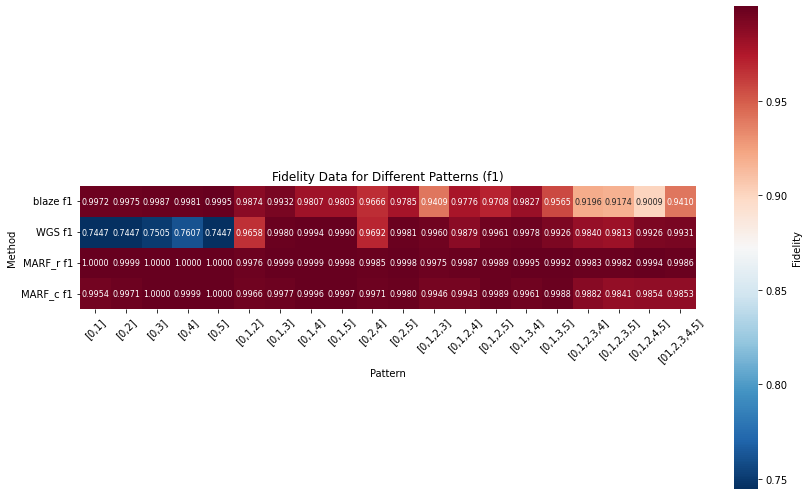

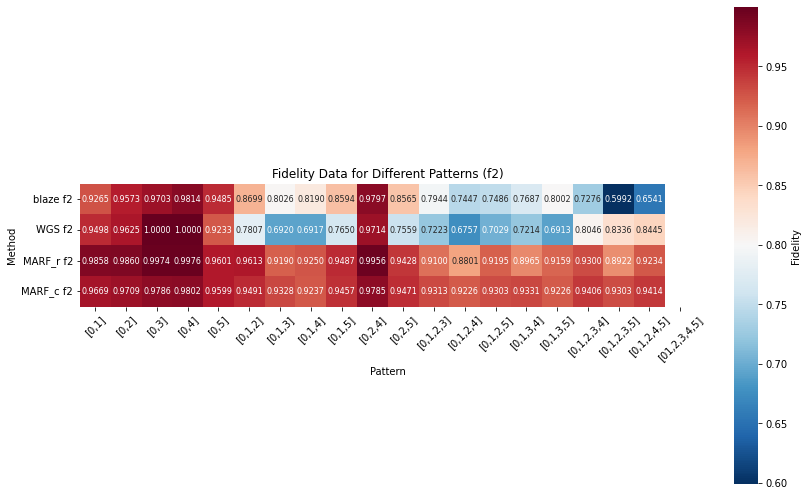

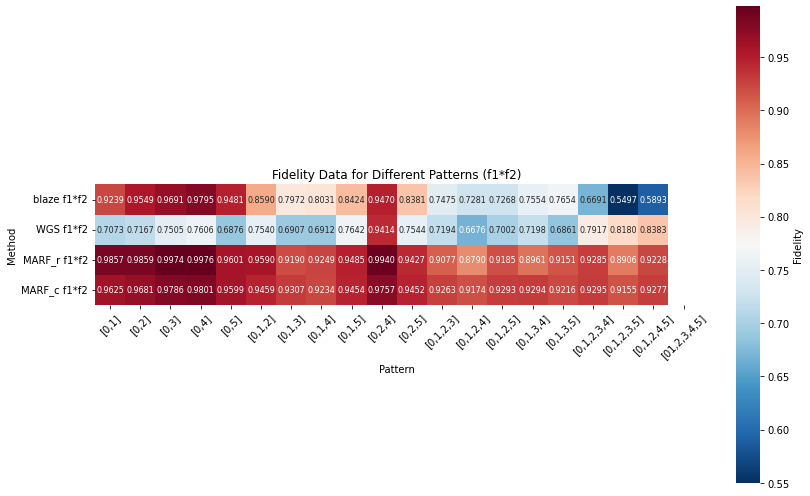

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame from the provided data
data = {
    "Pattern": ["[0,1]", "[0,2]", "[0,3]", "[0,4]", "[0,5]", "[0,1,2]", "[0,1,3]", "[0,1,4]", "[0,1,5]",
                "[0,2,4]", "[0,2,5]", "[0,1,2,3]", "[0,1,2,4]", "[0,1,2,5]", "[0,1,3,4]", "[0,1,3,5]",
                "[0,1,2,3,4]", "[0,1,2,3,5]", "[0,1,2,4,5]", "[01,2,3,4,5]"],
    "WGS f1": [0.9994007991542295, 0.9996253204486911, 0.9922285491382955, 0.9999884556026458, 0.9993139436737258, 0.8186613645796205, 0.8175262468952704, 0.8161461820117955, 0.8121324149848689, 0.8139520427114629, 0.8094692993731355, 0.9936691042984568, 0.9923356311119587, 0.9782005078879129, 0.9931859449976673, 0.992018717696619, 0.8244552548812878, 0.8165696937299862, 0.8211821164904801, 0.7060475390457879],
    "WGS f2": [0.9636835704007495, 0.9962405229499364, 0.925063993018904, 0.9251070150262294, 0.9267730142700585, 0.9473483600517838, 0.9415816575779268, 0.9389210167678269, 0.9398803538323263, 0.9141894531494533, 0.9249104097411207, 0.9061877178860003, 0.8884549136323946, 0.9405797827098396, 0.8952772155442394, 0.8876901592625291, 0.9040840496584809, 0.8884826950238471, 0.8905626726069316,None],
    "WGS f1*f2": [0.9631061303903102, 0.9958672519978018, 0.9178749036532254, 0.9250963352232527, 0.9261371957805984, 0.775557501172259, 0.7697677186651102, 0.7662968030456949, 0.7633073015546802, 0.7441063728162728, 0.7486865813560647, 0.9004507379580445, 0.881645467433923, 0.9200756211558678, 0.8891767473551857, 0.8806052535035216, 0.7453768455952897, 0.7255080421600156, 0.7313141403587786,None],
    "MARF_r f1": [0.9999530975191092, 0.9999382609288691, 0.999993389143678, 0.9999950956942621, 0.9999948276581022, 0.997585640324343, 0.9999268692246727, 0.9999034886420165, 0.999774311718457, 0.9984891502106291, 0.9998497616458524, 0.9974956855939042, 0.9987014435226095, 0.9989191980430648, 0.9994769017628413, 0.9991933880187467, 0.9983374084452653, 0.9981848913351083, 0.999402112786597, 0.9986138670993363],
    "MARF_r f2": [0.9857644712683095, 0.9860056590649126, 0.9974309852626608, 0.9976298977181283, 0.9601310641662483, 0.9613367062958444, 0.9190196158349149, 0.9250334350867351, 0.9487331626389421, 0.9955538890881143, 0.9428170373984409, 0.9099776831433157, 0.8800983521824665, 0.9195369956511811, 0.8965285858463564, 0.9158689702735469, 0.930048511486917, 0.8922272115447727, 0.9234014056614219, None],
    "MARF_r f1*f2": [0.985718236469033, 0.9859447839913921, 0.9974243913897262, 0.9976250050360966, 0.9601260980401177, 0.9590156937174349, 0.9189524072178679, 0.9249441588537347, 0.9485190446818232, 0.9940497567044781, 0.9426753901184798, 0.9076988129221942, 0.8789554947664991, 0.918543158266807, 0.8960596133235378, 0.9151302193888661, 0.9285022206862253, 0.8906077222020456, 0.9228493157681386, None],
    "MARF_c f1":[0.9954420615266744, 0.9971426897796452, 0.999998796280069, 0.9999365126487572, 0.9999819575421498, 0.9966467365366106, 0.9977417279626634, 0.9996449790502029, 0.9997355181122407, 0.9971382590380918, 0.998026836835113, 0.9946046788777632, 0.9942996246308428, 0.9988836130883205, 0.9960878847769137, 0.9988426854723663, 0.9881762723986628, 0.9841481643968164, 0.9853997027879828,0.9853],
    "MARF_c f2":[0.9668846877908847, 0.9708969961154472, 0.9785674455148353, 0.9801957720440733, 0.9598940837165845, 0.9491018526045549, 0.9328286228365745, 0.9237278761199083, 0.9456648086053141, 0.9785145169497073, 0.9470620688918436, 0.9312970242775108, 0.9226330655635546, 0.9302893173938492, 0.9330774079907017, 0.9226354152256679, 0.9406149317225909, 0.930289140241139, 0.9414439048129887,None],
    "MARF_c f1*f2":[0.9624776868731332, 0.9681228422055347, 0.9785662675936974, 0.9801335420108067, 0.9598767648680383, 0.9459192640391809, 0.9307220420419955, 0.9233999333719741, 0.9454146973915466, 0.9757142618747305, 0.9451933609026445, 0.9262723777713501, 0.9173737107618462, 0.9292507545758355, 0.9294271016585833, 0.9215676358559179, 0.9294933569921526, 0.9155423497266094, 0.9276985439942771, None],
    "blaze f1":[0.9959771820766448, 0.9993412740581202, 0.9992710971013375, 0.9941885703581077, 0.9996465890689958, 0.8142308144014825, 0.8108912953513419, 0.8121215372085596, 0.8113820950653612, 0.8063844761791239, 0.8109293716486079, 0.9963615026218373, 0.9923044186537192, 0.9942243616704826, 0.9948991728940022, 0.9933189370917074, 0.8308125096047432, 0.8271567523088804, 0.825242846854294, 0.7106413344546234],
    "blaze f2":[0.9324777808512859, 0.9938568700009833, 0.9342680204705532, 0.9227501721319211, 0.9956439626784762, 0.9385733341961867, 0.9254276248079215, 0.9267424833497929, 0.9192958888530313, 0.918536307244993, 0.9281018757446196, 0.8997457033915106, 0.8843061205962377, 0.8884787908694824, 0.9047738410841173, 0.8762573520967967, 0.8883189099050615, 0.9115774706343405, 0.867953779488815, None],
    "blaze f1*f2":[0.9287265925213468, 0.9932021906981983, 0.9335870298023046, 0.9173876744295325, 0.9952920912186773, 0.7642153302780759, 0.750421205434411, 0.7526275301745118, 0.7459002242825459, 0.7406934189692606, 0.7526250709234787, 0.8964719810087075, 0.8775008709101754, 0.8833472587099733, 0.9001587461507177, 0.8704030216035841, 0.7380264628675739, 0.7540174600878449, 0.7162726479232939, None]
}

for key in data:
    print(f"Length of '{key}': {len(data[key])}")
df = pd.DataFrame(data)

# Columns for the three heatmaps
cols_f1 = ["blaze f1", "WGS f1", "MARF_r f1", "MARF_c f1"]
cols_f2 = ["blaze f2", "WGS f2", "MARF_r f2", "MARF_c f2"]
cols_f1f2 = ["blaze f1*f2", "WGS f1*f2", "MARF_r f1*f2", "MARF_c f1*f2"]

# Function to plot the heatmap
def plot_heatmap(columns, title, font_size=8, figsize=(12, 7)):
    plt.figure(figsize=figsize)
    
    # Create the heatmap with adjusted font size and format for annotations
    sns.heatmap(df.set_index('Pattern')[columns].T, cmap="RdBu_r", annot=True, cbar_kws={'label': 'Fidelity'}, 
                square=True, fmt=".4f", annot_kws={"size": font_size})
    plt.title(title)
    plt.ylabel("Method")
    plt.xlabel("Pattern")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plotting the heatmaps
plot_heatmap(cols_f1, "Fidelity for different methods in simulation (f1)")
plot_heatmap(cols_f2, "Fidelity for different methods in simulation (f2)")
plot_heatmap(cols_f1f2, "Fidelity for different methods in simulation (f1*f2)")
